## yt_xarary scipy2023 sample figure creation 

### initialization

Create directory structure, fetch some data

In [1]:
from yt_xarray_demo.demo_setup import initialize

In [2]:
initialize()

yt_xarray : [INFO ] 2023-02-27 13:24:29,833:  Initializing directories for scipy2023 demo
yt_xarray : [INFO ] 2023-02-27 13:24:29,833:  Fetching all sample data
yt_xarray : [INFO ] 2023-02-27 13:24:29,834:      ./data/DBRD-NATURE2020-depth.r0.1.nc already exists.


## Plotting

In [3]:
import xarray as xr
import yt_xarray 
import yt

ds = xr.open_dataset("./data/DBRD-NATURE2020-depth.r0.1.nc")

In [4]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 90, longitude: 180, depth: 29)
Coordinates:
  * latitude   (latitude) float32 89.0 87.0 85.0 83.0 ... -85.0 -87.0 -89.0
  * longitude  (longitude) float32 1.0 3.0 5.0 7.0 ... 353.0 355.0 357.0 359.0
  * depth      (depth) float32 50.0 70.0 90.0 100.0 ... 590.0 610.0 625.0 650.0
Data variables:
    dvs        (depth, latitude, longitude) float32 ...
    lQ         (depth, latitude, longitude) float32 ...
    mp         (depth, latitude, longitude) float32 ...
Attributes: (12/34)
    title:                         Data for 'Seismic evidence for partial mel...
    id:                            DBRD_NATURE2020
    data_revision:                 r0.1
    summary:                       This dataset contains 3 seismic models : D...
    keywords:                      seismic, tomography, S-waves, isotropic Vo...
    Conventions:                   CF-1.0
    ...                            ...
    geospatial_vertical_max:       650.
    geospatial_vertical_units:     km
    geospatial_vertical_positive:  down
    NCO:                           netCDF Operators version 4.7.5 (Homepage =...
    netcdf_file:                   DBRD_NATURE2020_depth.nc
    model:                         DBRD_NATURE2020

In [5]:
ds.dvs.max()

<xarray.DataArray 'dvs' ()>
array(5.625, dtype=float32)

In [6]:
yt_ds = ds.yt.load_grid(use_callable=False)

yt_xarray : [INFO ] 2023-02-27 13:24:29,963:  Inferred geometry type is geodetic. To override, use ds.yt.set_geometry
yt_xarray : [INFO ] 2023-02-27 13:24:29,964:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2023-02-27 13:24:29,964:      stretched grid detected: yt_xarray will interpolate.
yt : [INFO     ] 2023-02-27 13:24:30,159 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-02-27 13:24:30,160 Parameters: domain_dimensions         = [ 28  89 179]
yt : [INFO     ] 2023-02-27 13:24:30,161 Parameters: domain_left_edge          = [ 50. -89.   1.]
yt : [INFO     ] 2023-02-27 13:24:30,161 Parameters: domain_right_edge         = [650.  89. 359.]
yt : [INFO     ] 2023-02-27 13:24:30,162 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2023-02-27 13:24:30,279 xlim = 1.000000 359.000000
yt : [INFO     ] 2023-02-27 13:24:30,280 ylim = -89.000000 89.000000
yt : [INFO     ] 2023-02-27 13:24:30,280 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2023-02-27 13:24:30,282 xlim = 1.000000 359.000000
yt : [INFO     ] 2023-02-27 13:24:30,283 ylim = -89.000000 89.000000
yt : [INFO     ] 2023-02-27 13:24:30,406 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



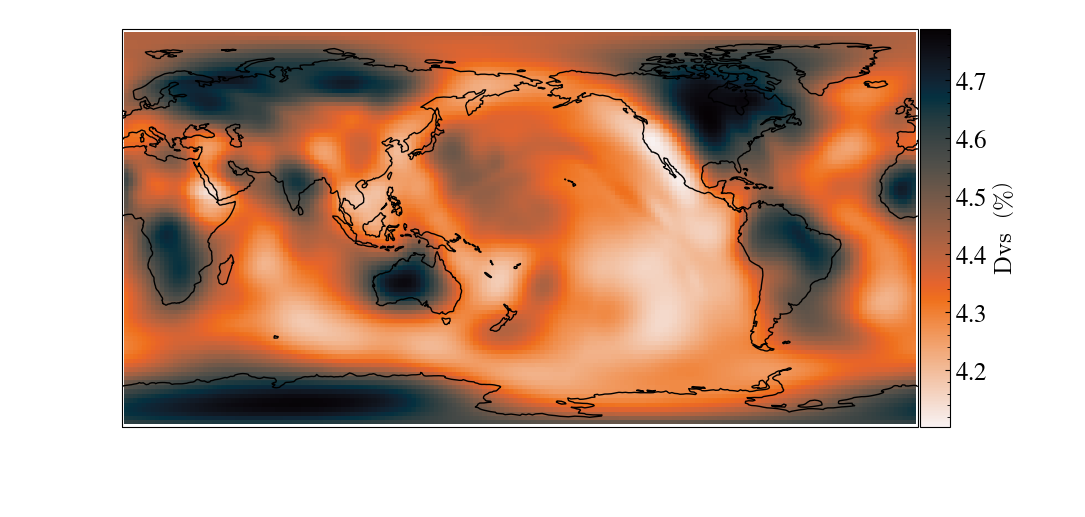

In [7]:
slc = yt.SlicePlot(yt_ds, "depth", ("stream", "dvs"), center=yt_ds.arr([100, 0, 180], 'code_length'))
slc.set_log(("stream", "dvs"), False)
slc.set_cmap(("stream", "dvs"), 'dusk_r')

slc.set_mpl_projection(('PlateCarree', (), {'central_longitude':-180}))#{'central_longitude':-100, 'central_latitude':40}))
slc._setup_plots()

slc.plots['dvs'].axes.coastlines()
slc.show()

yt : [INFO     ] 2023-02-27 13:24:35,802 xlim = 1.000000 359.000000
yt : [INFO     ] 2023-02-27 13:24:35,802 ylim = -89.000000 89.000000
yt : [INFO     ] 2023-02-27 13:24:35,803 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2023-02-27 13:24:35,805 xlim = 1.000000 359.000000
yt : [INFO     ] 2023-02-27 13:24:35,805 ylim = -89.000000 89.000000
yt : [INFO     ] 2023-02-27 13:24:35,809 Making a fixed resolution buffer of (('stream', 'lQ')) 800 by 800



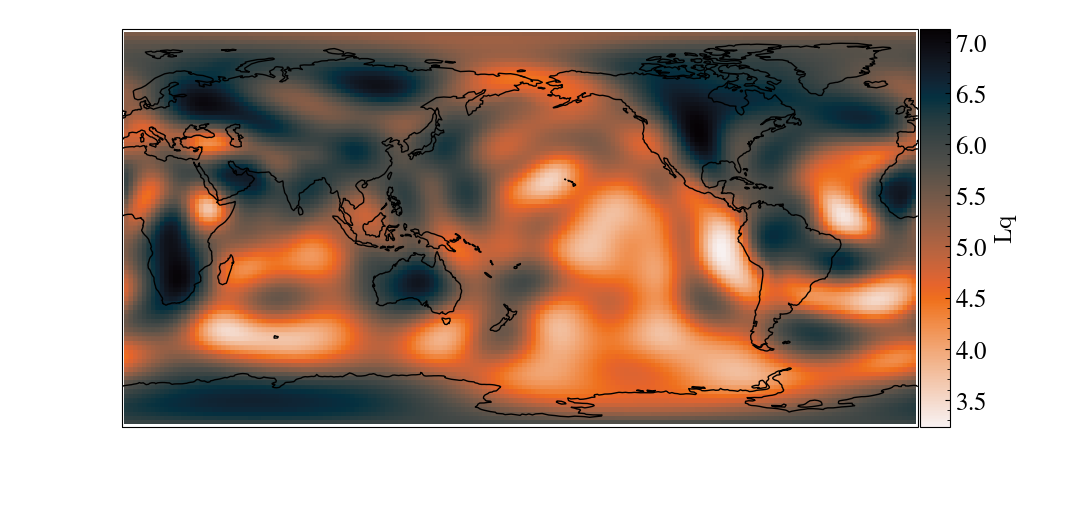

In [8]:
slc = yt.SlicePlot(yt_ds, "depth", ("stream", "lQ"), center=yt_ds.arr([100, 0, 180], 'code_length'))
slc.set_log(("stream", "lQ"), False)
slc.set_cmap(("stream", "lQ"), 'dusk_r')

slc.set_mpl_projection(('PlateCarree', (), {'central_longitude':-180}))#{'central_longitude':-100, 'central_latitude':40}))
slc._setup_plots()

slc.plots['lQ'].axes.coastlines()
slc.show()

yt : [INFO     ] 2023-02-27 13:24:40,208 xlim = 1.000000 359.000000
yt : [INFO     ] 2023-02-27 13:24:40,209 ylim = -89.000000 89.000000
yt : [INFO     ] 2023-02-27 13:24:40,210 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2023-02-27 13:24:40,211 xlim = 1.000000 359.000000
yt : [INFO     ] 2023-02-27 13:24:40,211 ylim = -89.000000 89.000000
yt : [INFO     ] 2023-02-27 13:24:40,214 Making a fixed resolution buffer of (('stream', 'mp')) 800 by 800



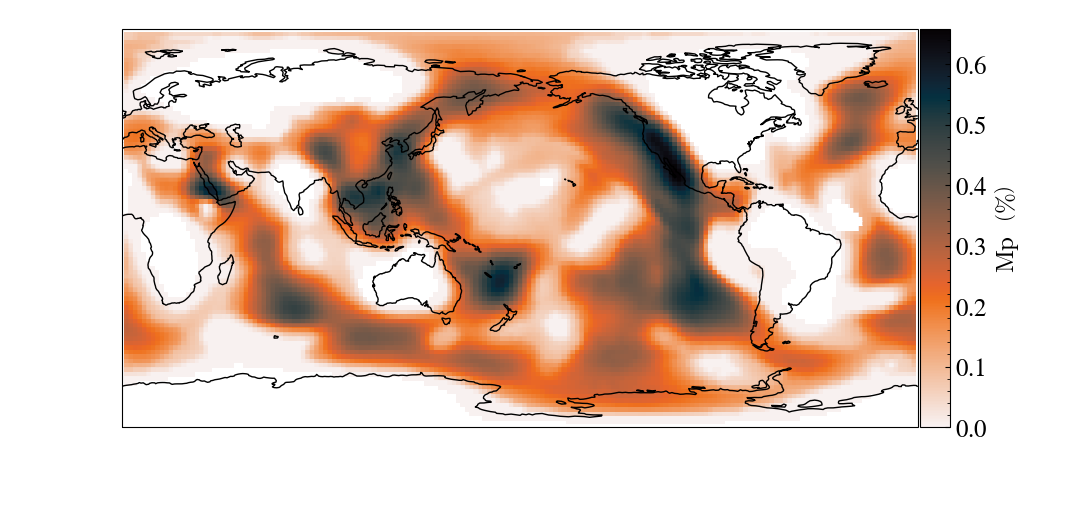

In [9]:
slc = yt.SlicePlot(yt_ds, "depth", ("stream", "mp"), center=yt_ds.arr([100, 0, 180], 'code_length'))
slc.set_log(("stream", "mp"), False)
slc.set_cmap(("stream", "mp"), 'dusk_r')

slc.set_mpl_projection(('PlateCarree', (), {'central_longitude':-180}))
slc._setup_plots()

slc.plots['mp'].axes.coastlines()
slc.show()


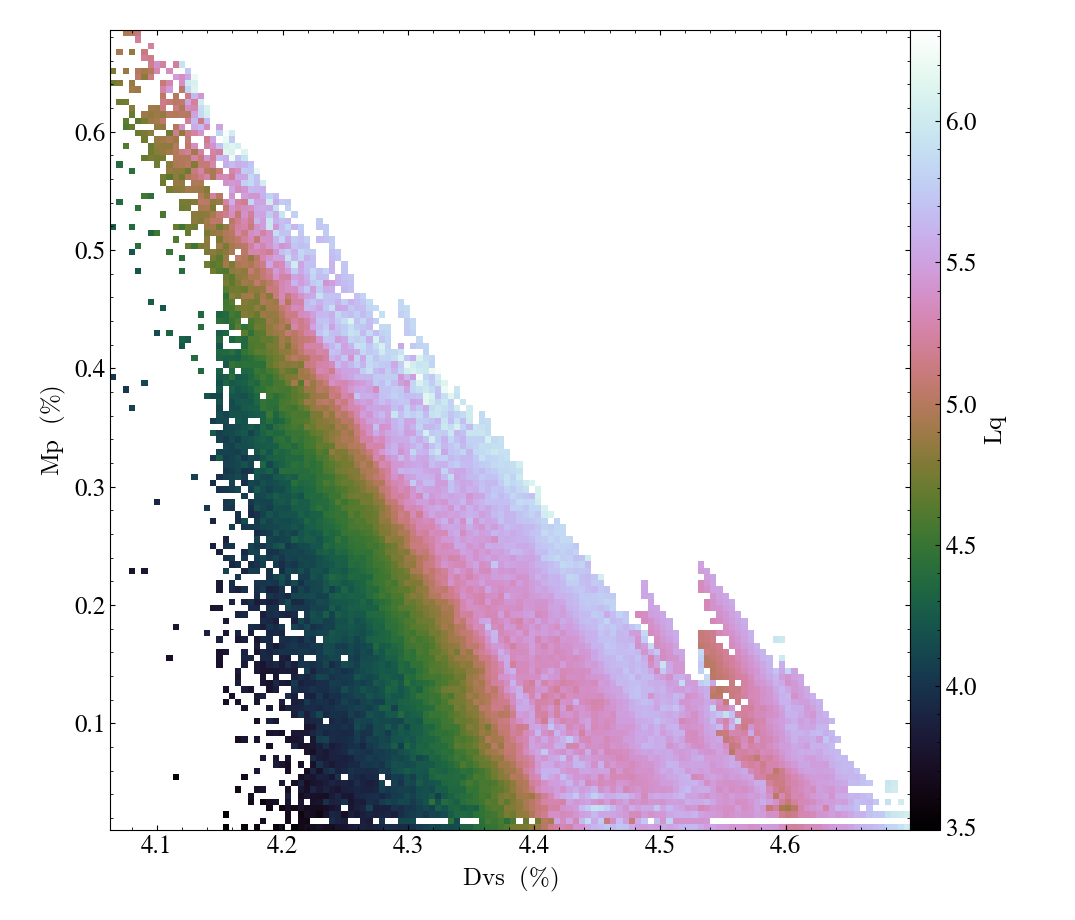

In [10]:
nonzero_phi = yt_ds.cut_region(yt_ds.all_data(), ["obj[('stream', 'mp')] > 0", "obj[('index', 'depth')] < 400"])
pp = yt.PhasePlot(nonzero_phi, ("stream", "dvs"),("stream", "mp"),  ("stream", "lQ"), weight_field= ("stream", "lQ"))
pp.set_log(("stream", "lQ"), False)
pp.set_log(("stream", "dvs"), False)
pp.set_log(("stream", "mp"), False)
pp.set_cmap(("stream", "lQ"), "cubehelix")
pp.show()